In [1]:
# Lib imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

%matplotlib inline
plt.style.use('fivethirtyeight') 

In [2]:
data = pd.read_csv('datasets/AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.shape

(48895, 16)

In [54]:
df = data.groupby('neighbourhood')['price']
df.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Allerton,42.0,87.595238,73.048617,33.0,47.00,66.5,104.75,450.0
Arden Heights,4.0,67.250000,18.300729,41.0,62.75,72.5,77.00,83.0
Arrochar,21.0,115.000000,133.119120,32.0,34.00,65.0,125.00,625.0
Arverne,77.0,171.779221,193.347902,35.0,75.00,125.0,200.00,1500.0
Astoria,900.0,117.187778,349.898287,25.0,60.00,85.0,120.00,10000.0
...,...,...,...,...,...,...,...,...
Windsor Terrace,157.0,138.993631,84.630532,38.0,77.00,123.0,160.00,450.0
Woodhaven,88.0,67.170455,40.527335,10.0,45.00,52.0,70.25,250.0
Woodlawn,11.0,60.090909,19.821476,29.0,42.50,68.0,73.50,85.0


### Visualization & Statistical Analysis

**Comparing mean price of all listings across different neighbour groups**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

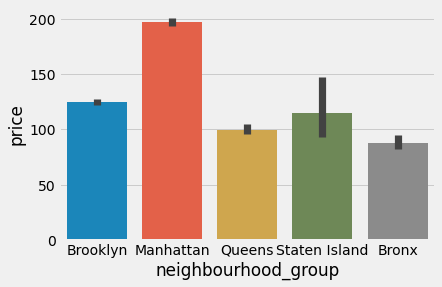

In [55]:
sns.barplot(x='neighbourhood_group', y='price', data=data, estimator=mean)

<AxesSubplot:xlabel='room_type', ylabel='price'>

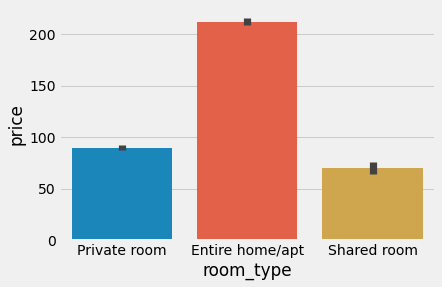

In [30]:
sns.barplot(x='room_type', y='price', data=data, estimator=mean)

**Comparing number of listings of different room types listed across different neighbour groups**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

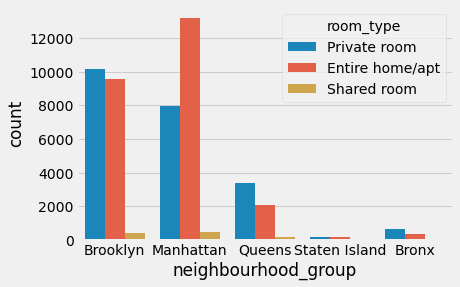

In [56]:
sns.countplot(data=data, x='neighbourhood_group', hue='room_type')

**Comparing mean price of different room types across different neighbourhood groups**

In [88]:
pd.DataFrame(data.groupby(['room_type','neighbourhood_group']).price.mean())

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.506596
                Brooklyn             178.327545
                Manhattan            249.239109
                Queens               147.050573
                Staten Island        173.846591
Private room    Bronx                 66.788344
                Brooklyn              76.500099
                Manhattan            116.776622
                Queens                71.762456
                Staten Island         62.292553
Shared room     Bronx                 59.800000
                Brooklyn              50.527845
                Manhattan             88.977083
                Queens                69.020202
                Staten Island         57.444444

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

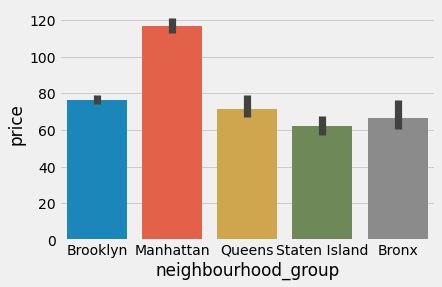

In [66]:
sns.barplot(data=data[data.room_type=='Private room'], x='neighbourhood_group', y='price')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

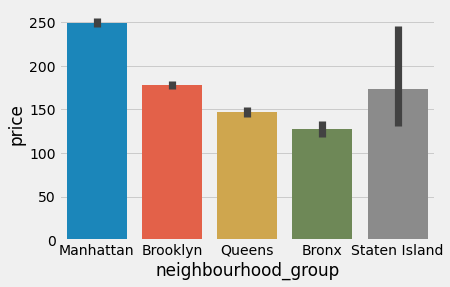

In [57]:
sns.barplot(data=data[data.room_type=='Entire home/apt'], x='neighbourhood_group', y='price')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

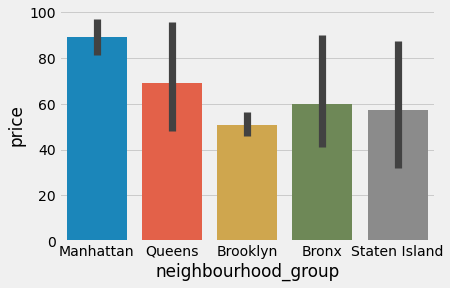

In [58]:
sns.barplot(data=data[data.room_type=='Shared room'], x='neighbourhood_group', y='price')

**Comparing number of listings based on neighbourhood group and room type**

Text(0.5, 1.0, 'Number of Listings In Each Neighbourhood Group')

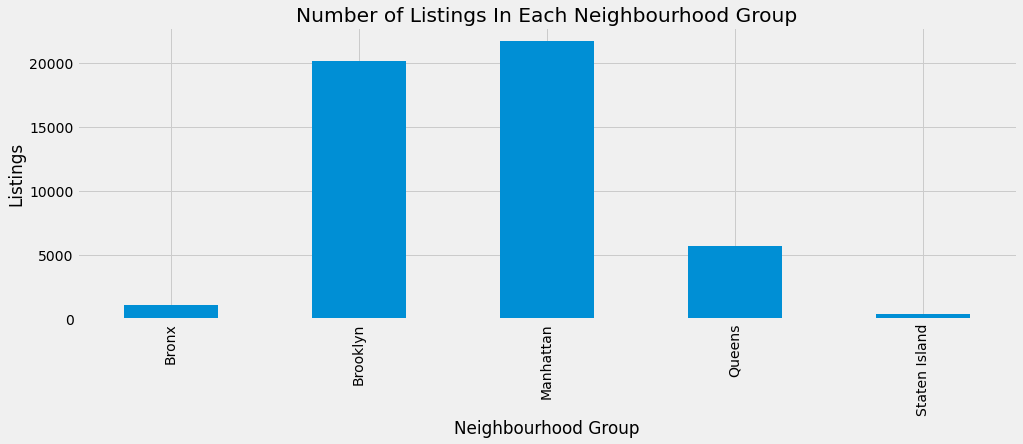

In [12]:
data.neighbourhood_group.value_counts().sort_index().plot(kind='bar', figsize=(15,5))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Listings')
plt.title('Number of Listings In Each Neighbourhood Group')

Text(0.5, 1.0, 'Number of Listings For Each Room Type')

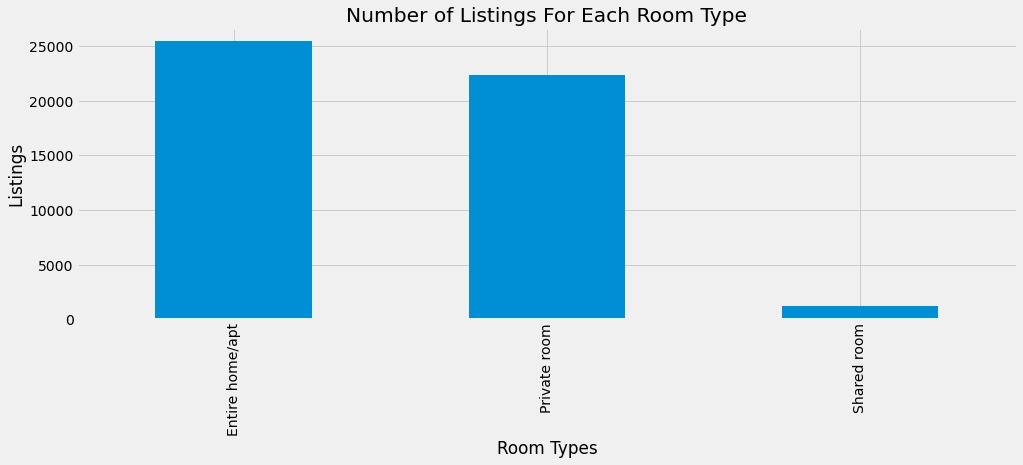

In [13]:
data.room_type.value_counts().plot(kind='bar', figsize=(15,5))
plt.xlabel('Room Types')
plt.ylabel('Listings')
plt.title('Number of Listings For Each Room Type')

### Handle missing data

In [90]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
enc_neighbourhood_group               0
enc_neighbourhood                     0
enc_room_type                         0
dtype: int64

The objective is to suggest a suitable pricing according to the neighbourhood which the property is located at and the room type. The correlation between the price and columns containing the missing value will be calculated and analyzed. If the correlation value is low, the empty values wil be ignored as they will not be taken as features to train the model. 

#### Assumption

Based on the analyzed data, we assume that Manhattan has the most entire home/apt for room type and has the highest average price across different neighbour group. While we also assume that entire home/apt has the highest listing price.